# Fourier Analysis

Plotting Functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def show(ori_func, ft, sampling_period=5):
    n=len(ori_func)
    interval=sampling_period/n
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(0, sampling_period, interval), ori_func, 'black')
    plt.xlabel('Time'), plt.ylabel('Amplitude')
    plt.subplot(2, 1, 2)
    frequency=np.arange(n/2)/(n*interval)
    nfft=abs(ft[range(int(n/2))]/n)
    plt.plot(frequency, nfft, 'red')
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum')
    plt.show();

# Signal Processing

We are going to use is our heartbeat signal which is a series of sine wave

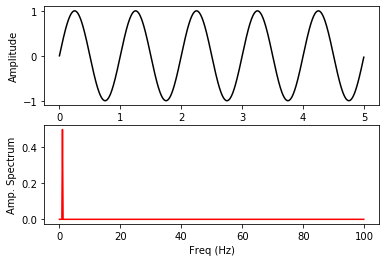

In [2]:
#the frequency is 60 beats per minute and our sampling period is 5 seconds long with a sampling interval of 0.005 seconds
time=np.arange(0, 5, .005)
x=np.sin(2*np.pi*1*time)
y=np.fft.fft(x)
show(x, y)

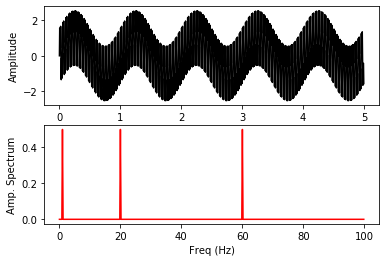

In [3]:
#in this we take two more frequencies at 20 and 60.
x2=np.sin(2*np.pi*20*time)
x3=np.sin(2*np.pi*60*time)
x+=x2+x3
y=np.fft.fft(x)
show(x, y)

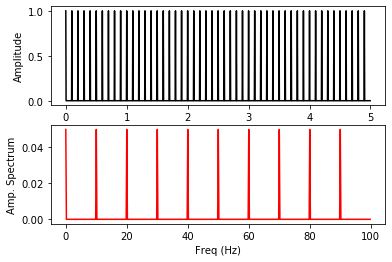

In [4]:
#square wave - we created square wave signals using numpy.zeros() with the same time intervals 
x=np.zeros(len(time))
x[::20]=1
y=np.fft.fft(x)
show(x, y)

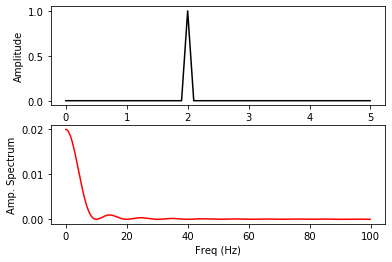

In [5]:
#one-pulse signal
x=np.zeros(len(time))
x[380:400]=np.arange(0, 1, .05)
x[400:420]=np.arange(1, 0, -.05)
y=np.fft.fft(x)
show(x, y)

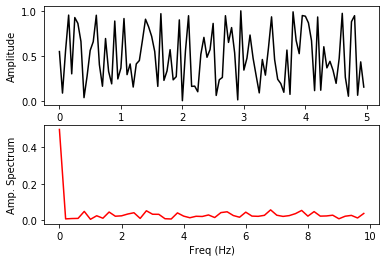

In [6]:
#random signal
x=np.random.random(100)
y=np.fft.fft(x)
show(x, y)

# Fourier Analysis

exp{-2(pi)j(m*k/n)}

In [7]:
x=np.random.random(500)
n=len(x)
m=np.arange(n)
k=m.reshape((n,1))
M=np.exp(-2j*np.pi*k*m/n)
y=np.dot(M, x)

Compare our result with built in numpy.fft

In [8]:
np.allclose(y, np.fft.fft(x))

True

Compare the performance between manual dft and numpy.fft

In [9]:
%timeit np.dot(np.exp(-2j*np.pi*np.arange(n).reshape((n, 1))*np.arange(n)/n), x)
%timeit np.fft.fft(x)

208 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.4 µs ± 59 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Compiler time: 0.14 s


inverse dft

In [10]:
M2=np.exp(2j*np.pi*k*m/n)
x2=np.dot(y,M2)/n

The computed inverse DFT result x2 should be identical with original randoom signal x

In [11]:
np.allclose(x, x2)

True

ifft func - for calcuating the inverse dft

In [12]:
np.allclose(x, np.fft.ifft(y))

True

The order and shift method in numpy.fft

In [13]:
a=np.random.randint(10, size=10)
a.mean()

3.6

In [14]:
#the dft of a
A=np.fft.fft(a)
A

array([36.        +0.00000000e+00j, -1.69098301+9.90659258e+00j,
        5.89918694-1.31432778e+00j, -2.80901699+9.64932244e+00j,
       -6.39918694-2.12662702e+00j,  4.        -8.88178420e-16j,
       -6.39918694+2.12662702e+00j, -2.80901699-9.64932244e+00j,
        5.89918694+1.31432778e+00j, -1.69098301-9.90659258e+00j])

The resuting dft ndarray follows the standard order in which the first value contains the zero frequency term 

In [15]:
A[0]/10

(3.6+0j)

To shift the zero frequency component to the center of the spectrum

In [16]:
np.fft.fftshift(A)

array([ 4.        -8.88178420e-16j, -6.39918694+2.12662702e+00j,
       -2.80901699-9.64932244e+00j,  5.89918694+1.31432778e+00j,
       -1.69098301-9.90659258e+00j, 36.        +0.00000000e+00j,
       -1.69098301+9.90659258e+00j,  5.89918694-1.31432778e+00j,
       -2.80901699+9.64932244e+00j, -6.39918694-2.12662702e+00j])

Multidimensional fourier transform

In [17]:
x=np.random.random(24)
x.shape=2,12
#two dimensional
y2=np.fft.fft2(x)
x.shape=1,2,12
#multi dimensional
y3=np.fft.fftn(x, axes=(1,2))
np.allclose(y2, y3)

True

# Fourier Transform Application

We use the image module in matplotlib to read in the image and convert it to greyscale

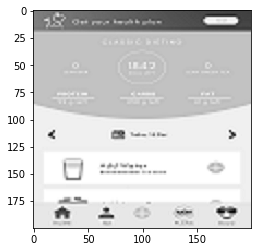

In [19]:
from matplotlib import image
img=image.imread('./Dashboard1.png')
gray_img=np.dot(img[:,:,:3],[.21,.72,.07])
gray_img.shape
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))
plt.show()

We are going to do the Fourier transform and shoe the spectrum

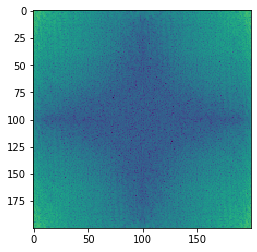

In [20]:
fft=np.fft.fft2(gray_img)
amp_spectrum=np.abs(fft)
plt.imshow(np.log(amp_spectrum))
plt.show()

When we use numpy.fft.fft2() the order follows the standard order and we want to place the zero frequency component to the center so we use the shift routine

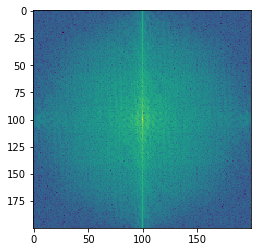

In [21]:
fft_shift=np.fft.fftshift(fft)
plt.imshow(np.log(np.abs(fft_shift)))
plt.show()

We interpolate zero frequency into the fft_shift array and make it twice the size then we inverse fft_shift to standard order and do another inverse transform back to the original domain

In [22]:
m, n=fft_shift.shape
b=np.zeros((int(m/2), n))
c=np.zeros((2*m, int(n/2)))
fft_shift=np.concatenate((b, fft_shift, b), axis=0)
fft_shift=np.concatenate((c, fft_shift, c), axis=1)
ifft=np.fft.ifft2(np.fft.ifftshift(fft_shift))
ifft.shape

(400, 400)

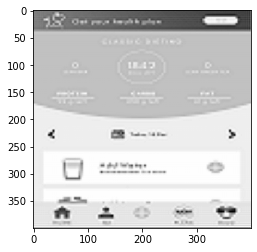

In [23]:
ifft=np.real(ifft)
plt.imshow(ifft, cmap=plt.get_cmap('gray'))
plt.show()